1. Importar as Bibliotecas:

In [45]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2. Criar a função que simula o problema de Monty Hall:

In [46]:
def simulacao_monty_hall(num_simulacoes):
    # Contador para vitórias ao trocar e para vitórias sem trocar
    acerto_alterado = 0  
    acerto_mantido = 0

    for i in range(num_simulacoes):
        # Definir onde está o prêmio (aleatoriamente entre as portas 1, 2 e 3)
        premio = random.randint(1, 3)
        
        # Jogador escolhe uma porta aleatoriamente
        escolha = random.randint(1, 3)
        
        # Apresentador abre uma das portas com uma "cabra"
        # Escolhe qualquer porta que não tenha o prêmio e não seja a escolha do jogador
        portas = [1, 2, 3]
        portas.remove(escolha)
        if premio in portas:
            portas.remove(premio)
        porta_aberta = random.choice(portas)
        
        # Simular as duas estratégias: trocar ou ficar
        # Se o jogador trocar, ele escolhe a outra porta restante
        porta_restante = [porta for porta in [1, 2, 3] if porta != escolha and porta != porta_aberta][0]
        
        # Verificar se a troca ou a permanência resulta em vitória
        if porta_restante == premio:
            acerto_alterado += 1
        if escolha == premio:
            acerto_mantido += 1

    # Calcular as probabilidades
    prob_ganhar_alterado = acerto_alterado / num_simulacoes
    prob_ganhar_mantido = acerto_mantido / num_simulacoes
    razao = prob_ganhar_alterado / prob_ganhar_mantido

    return razao

3. Armazenar as respostas das simulações:

In [ ]:
# Criar lista que armazenará as razões calculadas
lista_razao = []

# Chamada para a função num_simulacoes e para o armazenamento na lista_razao
for num_simulacoes in range(10,2000):
    razao = simulacao_monty_hall(num_simulacoes)
    lista_razao.append(razao)

4. Ajustar e criar um Dataframe

In [ ]:
df_razao = pd.DataFrame(lista_razao, columns=['valores'])
df_razao['num_simulacoes'] = df_razao.index

5. Plotar o Gráfico da Análise

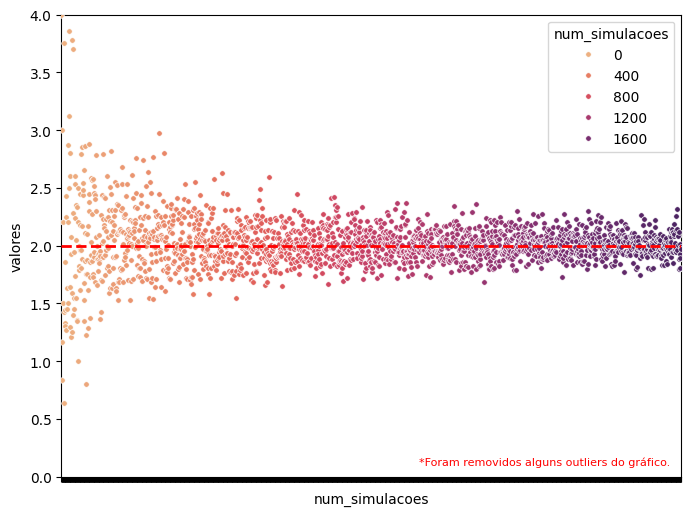

In [52]:
plt.figure(figsize=(8, 6))
plt.ylim(0, 4)
plt.xlim(0,2000)
plt.text(1550, 0.1, "*Foram removidos alguns outliers do gráfico.", color="red", ha="center", fontsize=8)
plt.axhline(y=2, color="red", linestyle="--", linewidth=2, zorder = 1000)
plt.gca().set_xticklabels([])
sns.swarmplot(x='num_simulacoes',y='valores', data=df_razao, dodge=False, palette='flare', hue='num_simulacoes', s=4, edgecolor="white", linewidth=0.5)
plt.show()